# Lab 1: Linear Regression and Overfitting

### Machine Learning and Pattern Recognition, September 2016

* The lab exercises should be made in groups of two people.
* The deadline is sunday September 25, 23:59.
* Assignment should be sent to your teaching assistant. The subject line of your email should be "\#lab\_lastname1\_lastname2\_lastname3".
* Put your and your teammates' names in the body of the email
* Attach the .IPYNB (IPython Notebook) file containing your code and answers. Naming of the file follows the same rule as the subject line. For example, if the subject line is "lab01\_Kingma\_Hu", the attached file should be "lab01\_Kingma\_Hu.ipynb". Only use underscores ("\_") to connect names, otherwise the files cannot be parsed.
* Make sure we can run your notebook / scripts!

Notes on implementation:

* You should write your code and answers in this IPython Notebook: http://ipython.org/notebook.html. If you have problems, please contact your teaching assistant.
* Please write your answers right below the questions.
* Among the first lines of your notebook should be "%pylab inline". This imports all required modules, and your plots will appear inline.
* Refer to last week's lab notes, i.e. http://docs.scipy.org/doc/, if you are unsure about what function to use. There are different correct ways to implement each problem!
* For this lab, your regression solutions should be in closed form, i.e., should not perform iterative gradient-based optimization but find the exact optimum directly.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

$\newcommand{\bPhi}{\mathbf{\Phi}}$
$\newcommand{\bx}{\mathbf{x}}$
$\newcommand{\bw}{\mathbf{w}}$
$\newcommand{\bt}{\mathbf{t}}$
$\newcommand{\by}{\mathbf{y}}$
$\newcommand{\bm}{\mathbf{m}}$
$\newcommand{\bS}{\mathbf{S}}$
$\newcommand{\bI}{\mathbf{I}}$

## Part 1: Polynomial Regression

### 1.1. Generate sinusoidal data (5 points)
Write a method `gen_sinusoidal(N)` that generates toy data like in fig 1.2 of Bishop's book. The method should have a parameter $N$, and should return $N$-dimensional vectors $\bx$ and $\bt$, where $\bx$ contains evenly spaced values from 0 to (including) 2$\pi$, and the elements $t_i$ of $\bt$ are distributed according to:

$$t_i \sim \mathcal{N}(\mu_i, \sigma^2)$$

where $x_i$ is the $i$-th elements of $\bf{x}$, the mean $\mu_i = sin(x_i)$ and the standard deviation $\sigma = 0.2$.


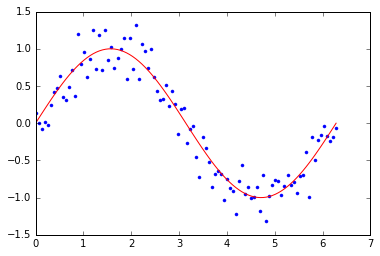

In [2]:
def gen_sinusoidal(N):
    sigma = 0.2
    
    # Create a linspace between 0 and 2pi with N points.
    x = np.linspace(0, 2 * np.pi, N)
    
    # Setup a mu with the points from the linspace
    mu = np.sin(x)
    
    # Create the normally distributed data
    t = np.random.normal(mu, sigma, N)
    
    return x, t

# Generate 100 sinusoidal datapoints
x, t = gen_sinusoidal(100)

# Plots the results with a sine from 0 to 2pi
plt.plot(x, t, 'b.')
plt.plot(x, np.sin(x), 'r-')
plt.show()



### 1.2 Polynomial regression (15 points)

Write a method `fit_polynomial(x, t, M)` that finds the maximum-likelihood solution of an _unregularized_ $M$-th order polynomial for some dataset `x`. The error function to minimize w.r.t. $\bw$ is:

$E(\bw) = \frac{1}{2} (\bPhi\bw - \bt)^T(\bPhi\bw - \bt)$

where $\bPhi$ is the _feature matrix_ (or _design matrix_) as explained in Bishop's book at section 3.1.1, $\bt$ is the vector of target values. Your method should return a vector $\bw$ with the maximum-likelihood parameter estimates. 

In [3]:
def fit_polynomial(x, t, M):
    Phi = np.array([x**i for i in range(M+1)]).T
    # Solving the derivative of the error function using solve.
    # This is different from the LSQ formula, but works better 
    # for when Phi^T*Phi is not invertable
    w_max = np.linalg.solve(np.dot(Phi.T, Phi), np.dot(Phi.T, t))
    
    return w_max

### 1.3 Plot (5 points)
Sample a dataset with $N=9$, and fit four polynomials with $M \in (0, 1, 3, 9)$.
For each value of $M$, plot the prediction function, along with the data and the original sine function. The resulting figure should look similar to fig 1.4 of the Bishop's book. Note that you can use matplotlib's `plt.pyplot(.)` functionality for creating grids of figures.

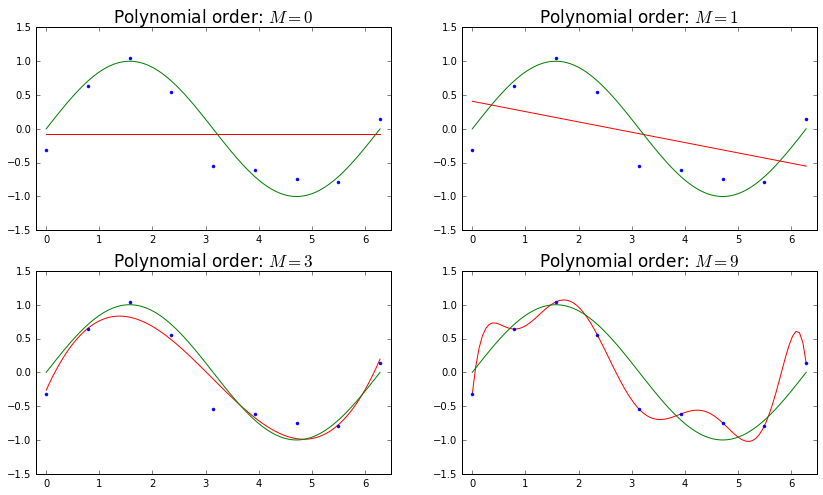

In [4]:
def plot_polynomial(w, points=100):
    x = np.linspace(0, 2 * np.pi, points)
    y = 0

    for i, w_i in enumerate(w):
        y += w_i*(x**i)
    
    plt.plot(x, y, 'r-')
    
def plot_sine(points=100):
    x = np.linspace(0, 2 * np.pi, points)
    plt.plot(x, np.sin(x), 'g-')

def plot_polynomials(N):
    x, t = gen_sinusoidal(N)

    orders = [0,1,3,9]

    plt.figure(figsize=(14, 8))
        
    for i, M in enumerate(orders):
        w = fit_polynomial(x, t, M)
        plt.subplot(2, int(len(orders)/2.), i+1)

        plt.title('Polynomial order: $M={}$'.format(M), fontsize='17')
        plt.axis([-0.2, 2*np.pi+0.2, -1.5, 1.5])
        
        plot_polynomial(w)
        plot_sine()
        plt.plot(x, t, 'b.')
        
    plt.show()
    
plot_polynomials(9)

### 1.4 Regularized linear regression (10 points)

Write a method `fit_polynomial_reg(x, t, M, lamb)` that fits a _regularized_ $M$-th order polynomial to the sinusoidal data, as discussed in the lectures, where `lamb` is the regularization term _lambda_. (Note that 'lambda' cannot be used as a variable name in Python since it has a special meaning). The error function to minimize w.r.t. $\bw$:

$E(\bw) = \frac{1}{2} (\bPhi\bw - \bt)^T(\bPhi\bw - \bt) + \frac{\lambda}{2} \mathbf{w}^T \mathbf{w}$

For background, see section 3.1.4 of Bishop's book.

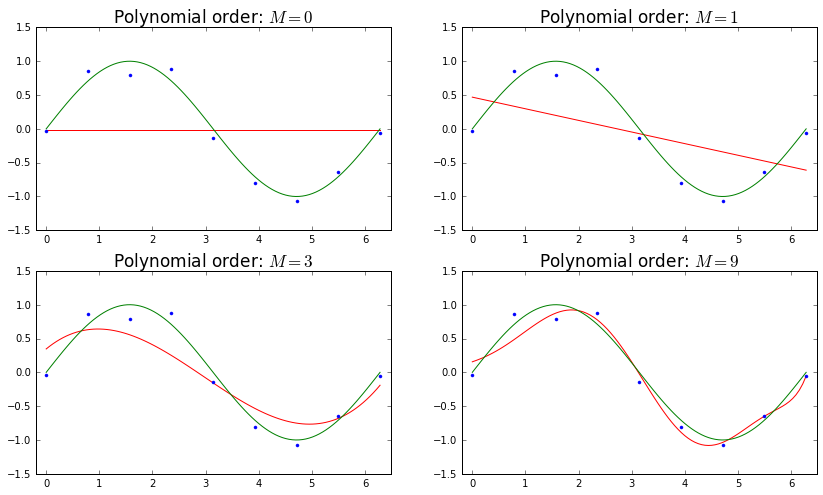

In [5]:
def fit_polynomial_reg(x, t, M, lamb):
    Phi = np.array([x**i for i in range(M+1)]).T
    w_max = np.linalg.solve(lamb*np.eye(np.dot(Phi.T, Phi).shape[0])+np.dot(Phi.T, Phi), np.dot(Phi.T, t))
    
    return w_max

def plot_polynomials_reg(N, lamb):
    x, t = gen_sinusoidal(N)

    orders = [0,1,3,9]
    
    plt.figure(figsize=(14, 8))

    for i, M in enumerate(orders):
        w = fit_polynomial_reg(x, t, M, lamb)
        
        plt.subplot(2, int(len(orders)/2.), i+1)
        
        plt.title('Polynomial order: $M={}$'.format(M), fontsize='17')
        plt.axis([-0.2, 2*np.pi+0.2, -1.5, 1.5])
        
        plot_polynomial(w)
        plot_sine()
        plt.plot(x, t, 'b.')

    plt.show()

plot_polynomials_reg(9, 0.9)



### 1.5 Model selection by cross-validation (10 points)
Use cross-validation to find a good choice of $M$ and $\lambda$, given a dataset of $N=9$ datapoints generated with `gen_sinusoidal(9)`. You should write a function that tries (loops over) a reasonable range of choices of $M$ and $\lambda$, and returns the choice with the best cross-validation error. In this case you can use $K=9$ folds, corresponding to _leave-one-out_ crossvalidation.

You can let $M \in (0, 1, ..., 10)$, and let $\lambda \in (e^{-10}, e^{-9}, ..., e^{0})$.

To get you started, here's a method you can use to generate indices of cross-validation folds.

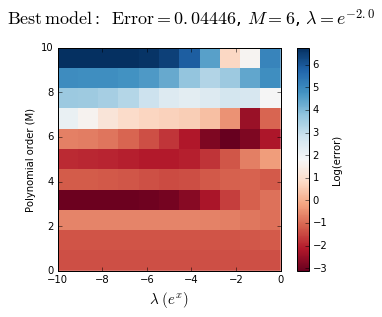

In [6]:
def kfold_indices(N, k):
    all_indices = np.arange(N,dtype=int)
    np.random.shuffle(all_indices)
    idx = np.floor(np.linspace(0,N,k+1)).astype(int)
    train_folds = []
    valid_folds = []
    for fold in range(k):
        valid_indices = all_indices[idx[fold]:idx[fold+1]]
        valid_folds.append(valid_indices)
        train_folds.append(np.setdiff1d(all_indices, valid_indices))
    return train_folds, valid_folds

def error_function(x, t, w, lamb=0):
    Phi = np.array([x**i for i in range(len(w))]).T
    s1 = (np.dot(Phi, w) - t) 
    
    return np.dot(s1, s1)/2 + (lamb/2) * np.dot(w.T, w)

def cross_validation(data, orders, lambdas, kfolds):
    """                                                                          
    Computes the log-errors for each combination of parameters 
    for polynomial regressions on the given data
                                     
    """  
    x, t = data
    
    # Initialize an error matrix
    errors = np.zeros((len(orders), len(lambdas)))

    tr_folds, va_folds = kfold_indices(len(x), kfolds)
            
    for M_i, M in enumerate(orders):
        for lamb_j, lamb in enumerate(lambdas):

            # For each fold, train using training set and 
            # compute the error on the validation set
            for i in range(kfolds):
                w = fit_polynomial_reg(x[tr_folds[i]], t[tr_folds[i]], M, lamb)
                fold_error = error_function(x[va_folds[i]], t[va_folds[i]], w, lamb)

                errors[M_i, lamb_j] += fold_error/kfolds

    return np.log(errors)

def plot_cross_validation(errors, order, lambdas):
    """                                                                          
    Plots an heat map of the errors in relations with the
    polynomial orders and regularization term lambda
                                     
    """ 
    fig = plt.figure()
    plt.ylabel('Polynomial order (M)')
    plt.xlabel('$\lambda \; (e^x)$', fontsize=15)

    error, M, lamb = min_error_crossval(errors, orders, lambdas)
    plt.title('$\mathrm{{Best\, model:}}\;\;\mathrm{{Error}}={:.4g}$, $M={}$, $\lambda=e^{{{}}}$'
              .format(np.exp(error), M, np.log(lamb)), fontsize='18', y=1.08, x=.6)

    plt.imshow(errors, interpolation='none', cmap="RdBu", 
               extent=[np.log(lambdas).min(), np.log(lambdas).max(), order.min(), order.max()],
               vmin=np.min(errors), vmax=np.max(errors), origin='lower')
    plt.colorbar(label='Log(error)')
    plt.show()


def min_error_crossval(errors, orders, lambdas):
    """                                                                          
    Finds the minimum log-error given a matrix of errors.
    
    Returns the log-error and the corresponding order and lambda
                                     
    """ 
    minval_idx = np.unravel_index(np.argmin(errors), errors.shape)
    
    return np.min(errors), orders[minval_idx[0]], lambdas[minval_idx[1]]
    

# Orders and Lambda too test using cross validation
orders = np.arange(0,11)
lambdas = np.array([np.exp(i) for i in range(-10, 1)])

data = gen_sinusoidal(9)

errors = cross_validation(data, orders, lambdas, 9)
plot_cross_validation(errors, orders, lambdas)

Create a comprehensible plot of the cross-validation error for each choice of $M$ and $\lambda$. Highlight the best choice. 

_Question_: Explain over-fitting and underfitting, illuminated by your plot. Explain the relationship with model bias and model variance.

Answer: 

Overfitting means that the model is describing the training data including the random noise, instead of desribing the underlying relationship of the data. Therefore, it will generally perform very bad on unseen/test data. Overfitting occurs when we have a very complex model for describing our data, in the case of polynomial regression this means a very high order polynomial with large weights. In other words, when our $M$ is big and $\lambda$ is small. Because an overfitting model is very dependent on the training data (and its noise), there is generally a lot of model variance. The model bias is not that high for an overfitting model, because these models do not consistently have the same bias in the error.

Underfitting means that the model is generalizing the trainig data too much, the model will perform bad on both the training and test set. Underfitting occurs when the model is not complex enough to model the data, in the case of polynomial regression we see underfitting for low values of $M$ or for high values of $\lambda$. In the case of underfitting the model variance is not high, i.e. the models will have the same error. The model bias will be high however, because underfitting models will consistently have an error.

### 1.6 Plot best cross-validated fit (5 points)

For some dataset with $N = 9$, plot the model with the optimal $M$ and $\lambda$ according to the cross-validation error, using the method you just wrote. Let the plot make clear which $M$ and $\lambda$ were found.

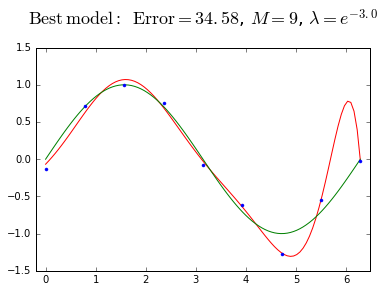

In [7]:
# Orders and Lambda too test using cross validation
orders = [9]#np.arange(0,11)
lambdas = np.array([np.exp(i) for i in range(-10, 1)])

x,t  = gen_sinusoidal(9)

error, M, lamb = min_error_crossval(cross_validation((x,t), orders, lambdas, 9), orders, lambdas)
w = fit_polynomial_reg(x, t, M, lamb)

plt.axis([-0.2, 2*np.pi+0.2, -1.5, 1.5])
plt.title('$\mathrm{{Best\, model:}}\;\;\mathrm{{Error}}={:.4g}$, $M={}$, $\lambda=e^{{{}}}$'
          .format(np.exp(error), M, np.log(lamb)), fontsize='18', y=1.08)

plot_polynomial(w)
plot_sine()
plt.plot(x, t, 'b.')

plt.show()

## Part 2: Bayesian Linear (Polynomial) Regression

### 2.1 Sinusoidal data 2 (5 points)

Write a function `gen_sinusoidal2(N)` that behaves identically to `gen_sinusoidal(N)` except that the generated values $x_i$ are not linearly spaced, but drawn from a uniform distribution between $0$ and $2 \pi$.

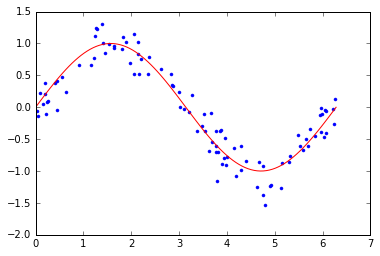

In [8]:
def gen_sinusoidal2(N):
    sigma = 0.2
    x = np.random.uniform(0,2*np.pi, N)
    mu = np.sin(x)
    t = np.random.normal(mu, sigma, N)
    
    return x, t

N=100

x, t = gen_sinusoidal2(N)

plt.plot(x, t, 'b.')
y = np.linspace(0, 2 * np.pi, N)
plt.plot(y, np.sin(y), 'r-')
plt.show()

### 2.2 Compute Posterior (15 points)

You're going to implement a Bayesian linear regression model, and fit it to the sinusoidal data. Your regression model has a zero-mean isotropic Gaussian prior over the parameters, governed by a single (scalar) precision parameter $\alpha$, i.e.:

$$p(\bw \;|\; \alpha) = \mathcal{N}(\bw \;|\; 0, \alpha^{-1} \bI)$$

The covariance and mean of the posterior are given by:

$$\bS_N= \left( \alpha \bI + \beta \bPhi^T \bPhi \right)^{-1} $$
$$\bm_N = \beta\; \bS_N \bPhi^T \bt$$

where $\alpha$ is the precision of the predictive distribution, and $\beta$ is the noise precision. 
See MLPR chapter 3.3 for background.

Write a method `fit_polynomial_bayes(x, t, M, alpha, beta)` that returns the mean $\bm_N$ and covariance $\bS_N$ of the posterior for a $M$-th order polynomial, given a dataset, where `x`, `t` and `M` have the same meaning as in question 1.2.

In [9]:
def fit_polynomial_bayes(x, t, M, alpha, beta):
    Phi = np.array([x**i for i in range(M+1)]).T
    S_n = np.linalg.inv(alpha*np.eye(M+1)+beta*np.dot(Phi.T, Phi))
    m_n = beta * np.dot(S_n, np.dot(Phi.T, t))
    
    return m_n, S_n

### 2.3 Prediction (10 points)

The predictive distribution of Bayesian linear regression is:

$$ p(t \;|\; \bx, \bt, \alpha, \beta) = \mathcal{N}(t \;|\; \bm_N^T \phi(\bx), \sigma_N^2(\bx))$$

$$ \sigma_N^2 = \frac{1}{\beta} + \phi(\bx)^T \bS_N \phi(\bx) $$

where $\phi(\bx)$ are the computed features for a new datapoint $\bx$, and $t$ is the predicted variable for datapoint $\bx$. 

Write a function that `predict_polynomial_bayes(x, m, S, beta)` that returns the predictive mean and variance given a new datapoint `x`, posterior mean `m`, posterior variance `S` and a choice of model variance `beta`.

In [10]:
def predict_polynomial_bayes(x, m, S, beta):
    # Create Phi as a power function
    phi_n = np.array([x**i for i in range(len(m))])

    mean = np.dot(m, phi_n)
    variance =  1./beta + np.dot(phi_n, np.dot(S, phi_n))
    
    return mean, variance

### 2.4 Plot predictive distribution (10 points)

a) (5 points) Generate 7 datapoints with `gen_sinusoidal2(7)`. Compute the posterior mean and covariance for a Bayesian polynomial regression model with $M=5$, $\alpha=\frac{1}{2}$ and $\beta=\frac{1}{0.2^2}$.
Plot the Bayesian predictive distribution, where you plot (for $x$ between 0 and $2 \pi$) $t$'s predictive mean and a 1-sigma predictive variance using `plt.fill_between(..., alpha=0.1)` (the alpha argument induces transparency).

Include the datapoints in your plot.

b) (5 points) For a second plot, draw 100 samples from the parameters' posterior distribution. Each of these samples is a certain choice of parameters for 5-th order polynomial regression. 
Display each of these 100 polynomials.

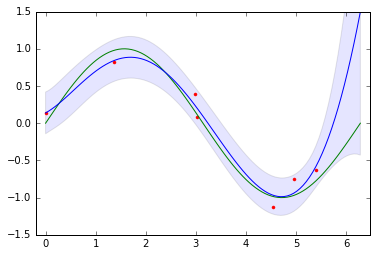

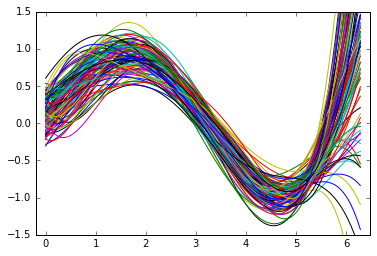

In [11]:
def plot_polynomial_bayes(mean, covariance, M, alpha, beta, points=100):
    means = np.zeros(points)
    variances = np.zeros(points)
    
    x = np.linspace(0, 2 * np.pi, points)
    
    for i, x_n in enumerate(x):
        # Predict the polynomial bayes based on the fit
        pred_mean, pred_variance = predict_polynomial_bayes(x_n, mean, covariance, beta)
        means[i] = pred_mean
        variances[i] = np.sqrt(pred_variance)
    
    upper_bound = means + variances
    lower_bound = means - variances
    
    plt.axis([-0.2, 2*np.pi+0.2, -1.5, 1.5])
    
    # Plot all the datapoints, sin wave, predicted mean and the predictive variance
    plt.plot(x, means, "b-")
    plt.fill_between(x, upper_bound, lower_bound, alpha=0.1)
            
def plot_posterior_distribution(mean, covariance, M):
    x = np.linspace(0, 2 * np.pi, 100)
    phi = np.array([x**i for i in range(M+1)]).T
    
    plt.axis([-0.2, 2*np.pi+0.2, -1.5, 1.5])
    for k in range(0,100):
        points = np.random.multivariate_normal(mean, covariance, 1)
        predicted_t = np.dot(phi, points.T)
        plt.plot(x, predicted_t)
        
    plt.show()
    
# Initialize the given variables
M = 5
alpha = .5
beta = 1.0/(0.2**2)
 
# Generate the sinusoidal data
x, t = gen_sinusoidal2(7)

# Fit the polynomial bayes
mean, covariance = fit_polynomial_bayes(x, t, M, alpha, beta)

plt.plot(x, t, "r.")
plot_sine()
plot_polynomial_bayes(mean, covariance, M, alpha, beta)
plt.show()

# B - Posterior distribution
plot_posterior_distribution(mean, covariance, M)

### 2.5 Additional questions (10 points)

a) (5 points) Why is $\beta=\frac{1}{0.2^2}$ the best choice of $\beta$ in section 2.4?

b) (5 points) In the case of Bayesian linear regression, both the posterior of the parameters $p(\bw \;|\; \bt, \alpha, \beta)$ and the predictive distribution $p(t \;|\; \bw, \beta)$ are Gaussian. In consequence (and conveniently), $p(t \;|\; \bt, \alpha, \beta)$ is also Gaussian (See Bishop's book section 3.3.2 and homework 2 question 4). This is actually one of the (rare) cases where we can make Bayesian predictions without resorting to approximative methods.

Suppose you have to work with some model $p(t\;|\;x,\bw)$ with parameters $\bw$, where the posterior distribution $p(\bw\;|\;\mathcal{D})$ given dataset $\mathcal{D}$ can not be integrated out when making predictions, but where you can still generate samples from the posterior distribution of the parameters. Explain how you can still make approximate Bayesian predictions using samples from the parameters' posterior distribution.